<a href="https://colab.research.google.com/github/hajin0324/DeepLearning/blob/main/tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **텐서(Tensor)**

다차원 넘파이 배열, 임의의 차원 개수를 가지는 행렬의 일반화된 모습

- 차원(dimension) = 축(axis)

### **스칼라(랭크-0 텐서)**  

하나의 숫자만 담고 있는 텐서  

넘파이에서 flot32, flot64 타입의 숫자

- **ndim :** 넘파이 배열의 축 개수(rank) 확인

    - 스칼라 텐서의 축 개수 =  0

In [1]:
import numpy as np

# 스칼라 생성
x = np.array(12)

# 스칼라 확인
x   

array(12)

In [2]:
# x의 차원(스칼라)
x.ndim 

0

### **벡터(랭크-1 텐서)**

숫자의 배열을 나타내며 딱 하나의 축을 가짐

In [3]:
# 벡터 생성
x = np.array([12, 3, 6, 14, 7])

# 벡터 확인
x  

array([12,  3,  6, 14,  7])

In [4]:
# x의 차원(벡터)
x.ndim 

1

x는 5개의 원소를 가지므로 5차원 벡터

- 5D 벡터 : 하나의 축을 따라 5개의 차원을 가진 것

- 5D 텐서 : 5개의 축을 가진 것

###**행렬(랭크-2 텐서)**

벡터의 배열이며 2개의 축이 있음 - 행(row), 열(column)

In [5]:
# 행렬 생성
x = np.array([[5, 78, 2, 34, 0],
							[6, 79, 3, 35, 1],
							[7, 80, 4, 36, 2]])

# x의 차원(행렬)
x.ndim

2

- 행 : 첫 번째 축에 놓여 있는 원소  
ex. [5, 78, 2, 34, 0]

- 열 : 두 번째 축에 놓여 있는 원소  
ex. [5, 6, 7]

###**랭크-3 텐서와 더 높은 랭크의 텐서**

행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석할  수 있는 랭크-3 생성

In [6]:
# 랭크-3 텐서 생성
x = np.array([[[5, 78, 2, 34, 0],
							 [6, 79, 3, 35, 1],
							 [7, 80, 4, 36, 2]],
							[[5, 78, 2, 34, 0],
							 [6, 79, 3, 35, 1],
							 [7, 80, 4, 36, 2]],
							[[5, 78, 2, 34, 0],
							 [6, 79, 3, 35, 1],
							 [7, 80, 4, 36, 2]]])

# x의 차원(랭크-3 텐서)
x.ndim

3

랭크-3 텐서들을 하나의 배열로 합치면 랭크-4 텐서가 만들어짐

###**텐서의 핵심 속성**

- 축의 개수(랭크)

- 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플

    - 스칼라 : ( )

    - 벡터 : (5, )

    - 행렬 : (3, 5)

    - 랭크-3 텐서 : (3, 3, 5)
    
- 데이터 타입(파이썬 라이브러리 : dtype) : 텐서에 포함된 데이터의 타입  
ex. float16, float32, float64, uint8(unsigned int), string

### **MNIST 데이터셋으로 tensor 확인**
**데이터셋 불러내기**

In [7]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**텐서의 핵심 속성 확인**

In [8]:
# train_images 배열의 축의 개수 확인
train_images.ndim

3

In [9]:
# 배열의 크기
train_images.shape

(60000, 28, 28)

In [10]:
# dtype 속성으로 데이터 타입 확인
train_images.dtype

dtype('uint8')

28 * 28 크기의 정수 행렬 6만 개가 있는 8비트 정수형 랭크-3 텐서

**Matplotlib 사용 : 데이터 시각화 라이브러리**

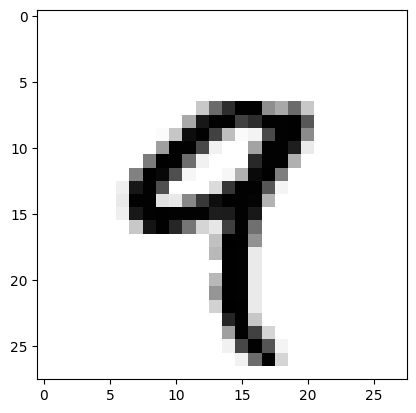

In [11]:
import matplotlib.pyplot as plt

# 다섯 번째 이미지 출력
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [12]:
# 다섯 번째 이미지의 label
train_labels[4]

9

### **Numpy로 텐서 조작**  

train_images[i] 같은 형식으로 첫 번째 축을 따라 특정 숫자 이미지 선택  

슬라이싱(slicing) : 배열에 있는 특정 원소들을 선택하는 것

In [13]:
# 11번째에서 101번째까지 숫자를 선택
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

더 자세한 표기법은 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정

In [14]:
my_slice = train_images[10:100, :, :]        # 이전 예와 동일
my_slice.shape  # (90, 28, 28)
my_slice = train_images[10:100, 0:28, 0:28]  # 이전 예와 동일
my_slice.shape  # (90, 28, 28)

# 이미지의 오른쪽 아래 14 * 14 픽셀을 선택
my_slice = train_images[:, 14:, 14:]

# 음수 인덱스 사용, 정중앙에 위치한 14 * 14 픽셀 조각을 선택
my_slice = train_images[:, 7:-7, 7:-7]

### **배치 데이터**  

샘플 축(sample axis) : 모든 데이터 텐서의 첫 번째 축(=sample dimension)  

한 번에 전체 데이터셋을 처리하지 않고 데이터를 작은 배치로 나눔


In [15]:
# MNIST 숫자 데이터에서 크기가 128인 배치 하나
batch = train_images[:128]

# 다음 배치
batch = train_images[128:256]

# n번째 배치
n = 3
batch = train_images[128 * n:128 * (n + 1)]

첫 번째 축 : 배치 축(batch axis) or 배치 차원(batch dimension)

###**텐서의 실제 사례**
- 벡터 데이터

    - (samples, features)

    - 랭크-2 텐서, 각 샘플은 수치 속성으로 구성된 벡터

- 시계열 데이터, 시퀀스 데이터

    - (samples, timesteps, features)

    - 랭크-3 텐서, 각 샘플은 특성 벡터의 시퀀스

- 이미지

    - (samples, height, width, channels) or (samples, channels, height, width)

    - 랭크-4 텐서, 각 샘플은 픽셀의 2D 격자, 각 픽셀은 수치 값(channel)의 벡터

- 동영상

    - (samples, frames, height, width, channels) or (samples, frames, channels, height, width)
    
    - 랭크-5 텐서, 각 샘플은 이미지의 시퀀스

###**벡터 데이터**

하나의 데이터 포인트가 벡터로 인코딩

- 첫 번째 축 : 샘플 축

- 두 번째 축 : 특성 축

예시

- 사람의 나이, 성별, 소득으로 구성된 인구 통계 데이터

    - 각 사람은 3개의 값을 가진 벡터로 구성

    - 10만 명이 포함된 전체 데이터셋 : (10000, 3)

- 2만 개의 단어로 표현된 텍스트 문서 데이터셋

    - 각 문서는 2만 개의 원소를 가진 벡터로 인코딩
    
    - 500개의 문서로 이루어진 전체 데이터셋 : (500, 20000)

###**시계열 데이터 또는 시퀀스 데이터**

데이터 시간(연속된 순서)가 중요할 때는 시간 축을 포함하여 랭크-3 텐서로 저장  

각 샘플은 벡터의 시퀀스(랭크-2 텐서)로 인코딩  

시간 축 : 두 번째 축(인덱스가 1인 축)

- 주식 가격 데이터셋

    - 1분마다 현재 주식 가격, 지난 1분 동안의 최고 가격과 최소 가격 저장

    - 하루 동안의 거래 : (390, 3)

    - 250일치의 데이터 : (250, 390, 3)

- 트윗 데이터셋

    - 각 트윗은 128개의 알파벳으로 구성된 280개의 문자 시퀀스

    - 각 문자가 128개의 크기인 이진 벡터로 인코딩(해당 문자의 인덱스만 1, 나머지는 0)

    - 각 트윗 : (280, 128)
    
    - 100만 개의 트윗으로 구성된 데이터셋 : (100000, 280, 128)

###**이미지 데이터**

이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원

흑백 이미지는 하나의 컬러 채널만 가지고 있어 랭크-2 텐서로 저장될 수 있음

- 256 * 256 크기의 이미지에 대한 128개의 배치

    - 흑백 이미지 : (128, 256, 256, 1)

    - 컬러 이미지 : (128, 256, 256, 3)
    

이미지 텐서의 크기를 지정하는 방식

- 채널 마지막 방식 : 컬러 채널의 깊이를 끝에 놓음

    - (samples, height, width, color_depth)
    
- 채널 우선 방식 : 컬러 채널의 깊이를 배치 축 바로 뒤에 놓음

    - (samples, color_depth, height, width)

###**비디오 데이터**

하나의 비디오는 프레임의 연속이고 각 프레임은 하나의 컬러 이미지

- 프레임 : (height, width, color_depth)

- 프레임의 연속 : (frames, height, width, color_depth)

- 여러 비디오의 배치 : (samples, frames, height, width, color_depth)